Notebook for exploring the relation between topological data analysis (TDA) features and behavioral data in the females from the training group. 

TDA data is constructed using the HCP_features.py file, which also used TDA code from Fernando. 

Behavioral data is constructed using the Make_cog_file_HCP Jupyer Notebook. 
Behavioral data is splitted into train and test group using Split_HCP_data_males Jupyter Notebook, or Split_HCP_data_females for females


# Import and order data

In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from matplotlib.offsetbox import AnchoredText
import statsmodels.formula.api as smf

In [444]:
tda = pd.read_csv("/Users/minneschepers/Desktop/HCP/TDA_data/TDA_features_HCP_Females_Train.csv")
bd = pd.read_csv("/Users/minneschepers/Desktop/HCP/Behavioral_Data/Females_train.csv")

In [445]:
bd.shape

(203, 41)

In [446]:
tda.shape

(203, 128)

In [447]:
tda['Subject']

0      HCA9688312
1      HCA7438480
2      HCA7907287
3      HCA7268178
4      HCA6119257
          ...    
198    HCA9372789
199    HCA6139970
200    HCA8743187
201    HCA8620979
202    HCA9300057
Name: Subject, Length: 203, dtype: object

In [448]:
# Only include subjects from bd which are also in tda
same = bd['subject'].isin(tda['Subject'])
print(same.value_counts())
bd.drop(bd[~same].index, inplace = True)
print(bd.shape)

True    203
Name: subject, dtype: int64
(203, 41)


In [449]:
# Only include subjects from tda which are also in bd
same = tda['Subject'].isin(bd['subject'])
print(same.value_counts())
tda.drop(tda[~same].index, inplace = True)
print(tda.shape)

True    203
Name: Subject, dtype: int64
(203, 128)


In [450]:
# Sort bd by subject and reset index before concatenating
bd.sort_values(by=['subject'], inplace=True)
bd.reset_index(drop=True, inplace=True)
print(bd['subject'])

0      HCA6018857
1      HCA6030645
2      HCA6051047
3      HCA6062456
4      HCA6086470
          ...    
198    HCA9914193
199    HCA9938814
200    HCA9953406
201    HCA9956008
202    HCA9992517
Name: subject, Length: 203, dtype: object


In [451]:
# Sort tda by subject and reset index before concatenating
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
print(tda['Subject'])

0      HCA6018857
1      HCA6030645
2      HCA6051047
3      HCA6062456
4      HCA6086470
          ...    
198    HCA9914193
199    HCA9938814
200    HCA9953406
201    HCA9956008
202    HCA9992517
Name: Subject, Length: 203, dtype: object


In [493]:
# Concatenate bd and tda into df
print(bd.shape)
print(tda.shape)
df = pd.concat([bd, tda], axis=1)
print(df.shape)

(203, 41)
(173, 128)
(203, 169)


In [490]:
df.to_csv('/Users/minneschepers/Desktop/HCP/Practice_data/Females_exploratory.csv', index=False)

In [453]:
# Create EF (executive functioning column) as mean of flanker and dccs
df['EF_age'] = df[['flanker_age', 'dccs_age']].mean(axis=1)
df['EF_unadjusted'] = df[['flanker_unadjusted', 'dccs_unadjusted']].mean(axis=1)

# Order bd columns in lists
age_adjusted = [i for i in bd.columns if '_age' in i]
age_adjusted.append('EF_age')
age_adjusted.append('age_years')
unadjusted = [i for i in bd.columns if '_unadjusted' in i]
unadjusted.append('EF_unadjusted')
natper = [i for i in bd.columns if '_np' in i]
subject_information = ['subject',  'sex', 'age_months']
WM = ['lswmt_unadjusted', 'lswmt_age']
EF = ['dccs_unadjusted', 'dccs_age',
       'flanker_unadjusted', 'flanker_age',
      'EF_unadjusted', 'EF_age']

In [454]:
# Order tda columns in lists
tda_features = tda.columns[1:]

DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]
global_features = [i for i in tda_features if i not in DMN_curvatures if i not in FPN_curvatures if i not in all_curvatures if i not in p3_cliques if i not in p4_cliques]

WM_age = ['lswmt_age']
EF_age = ['dccs_age', 'flanker_age', 'EF_age']
all_kur = [i for i in tda_features if 'kur' in i]
all_skew = [i for i in tda_features if 'skew' in i]
all_std = [i for i in tda_features if 'std' in i]
all_ent = [i for i in tda_features if 'curv_ent' in i]

---
# Create dataframe without nan values


In [455]:
to_include = age_adjusted + unadjusted

In [456]:
# Only include age_adjusted, and then add subject column
df_no_nan = df[to_include]
df_no_nan['subject'] = list(df['subject'])
df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])
print(df_no_nan.shape)

(203, 26)


<ipython-input-456-3ffb2cdb13d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['subject'] = list(df['subject'])
<ipython-input-456-3ffb2cdb13d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])


In [457]:
# Show number of non_nan_values per column
df_no_nan.count()

fluidcog_age                175
crystalcog_age              174
earlychildcog_age           175
totalcog_age                175
dccs_age                    176
flanker_age                 176
lswmt_age                   176
orrt_age                    176
pcps_age                    176
picseq_age                  176
pvt_age                     176
EF_age                      176
age_years                   203
fluidcog_unadjusted         182
crystalcog_unadjusted       181
earlychildcog_unadjusted    182
totalcog_unadjusted         182
dccs_unadjusted             183
flanker_unadjusted          183
lswmt_unadjusted            183
orrt_unadjusted             183
pcps_unadjusted             183
picseq_unadjusted           183
pvt_unadjusted              183
EF_unadjusted               183
subject                     203
dtype: int64

In [458]:
# Drop all nan values
df_no_nan = df_no_nan.dropna()

In [459]:
# Add tda data to df_no_nan
same = tda['Subject'].isin(df_no_nan['subject'])
tda.drop(tda[~same].index, inplace = True)

In [460]:
# Sort tda data and reset index
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
# Sort df and reset index
df_no_nan.sort_values(by=['subject'], inplace=True)
df_no_nan.reset_index(drop=True, inplace=True)

# Merge dataframes
print(df_no_nan.shape)
print(tda.shape)
df_no_nan = pd.concat([df_no_nan, tda], axis=1)
print(df_no_nan.shape)

(173, 26)
(173, 128)
(173, 154)


In [496]:
df_no_nan.to_csv('/Users/minneschepers/Desktop/HCP/Practice_data/Females_exploratory.csv', index=False)

# Data exploration

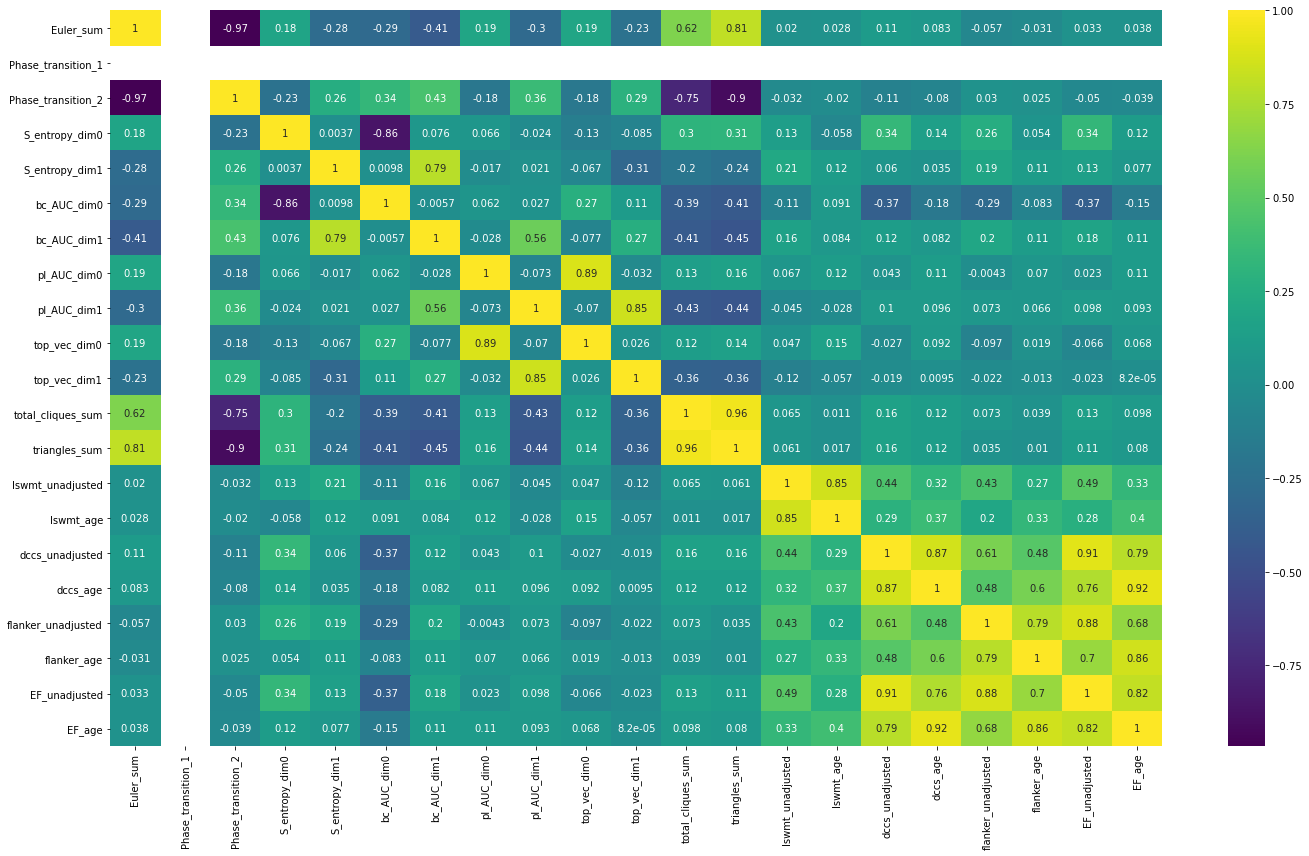

In [461]:
to_compare = global_features + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

In [462]:
# to_compare = DMN_curvatures + WM + EF
# fig, ax = plt.subplots(figsize=(25,15))
# sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
# plt.tight_layout()
# plt.savefig('/Users/minneschepers/Downloads/DMN_curvatures.png')

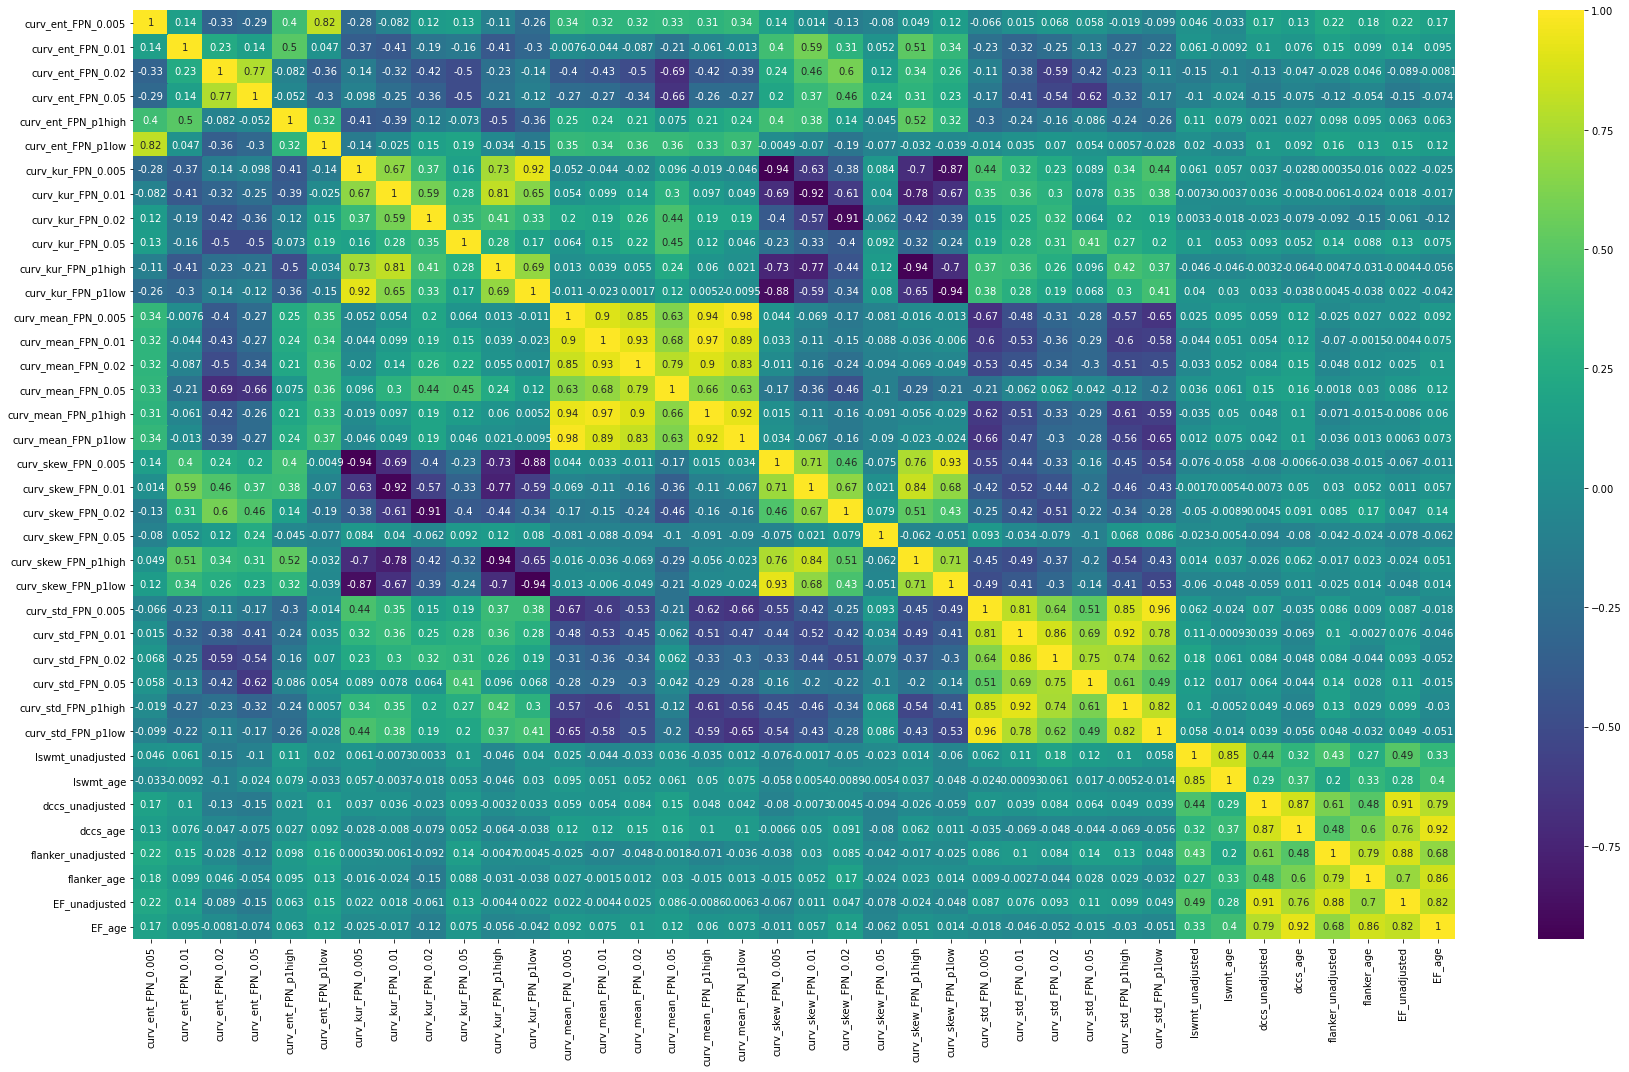

In [463]:
to_compare = FPN_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/FPN_curvatures.png')

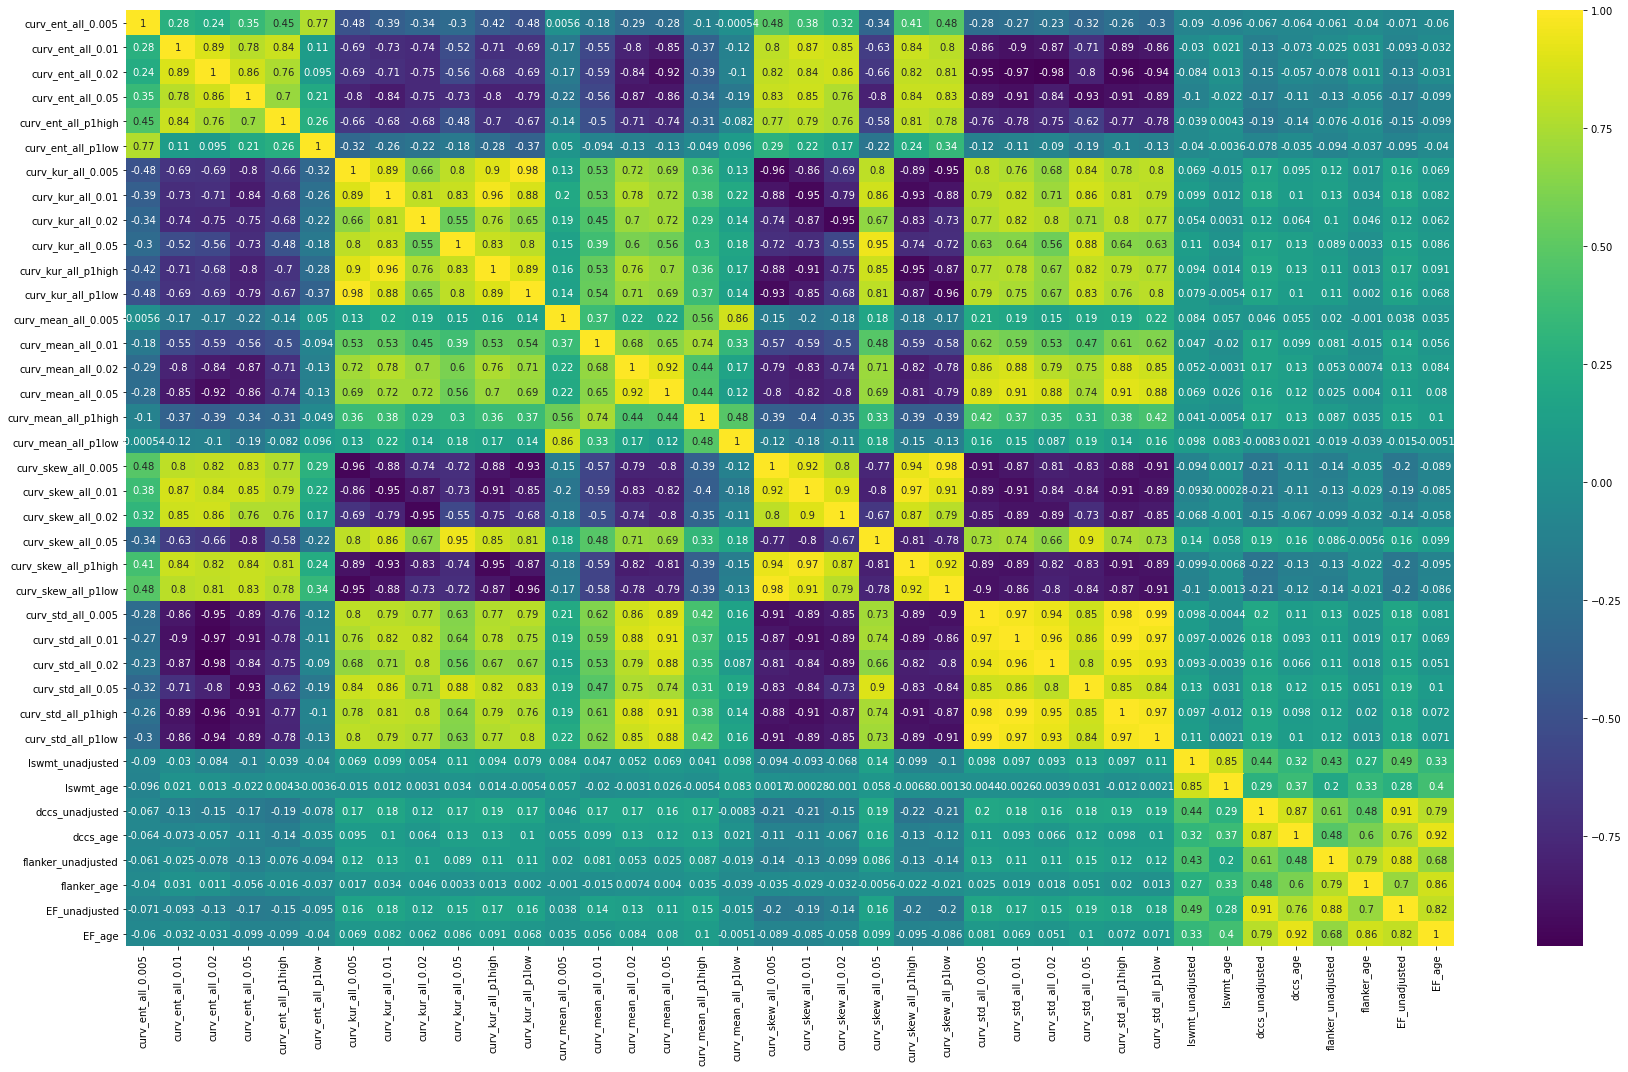

In [464]:
to_compare = all_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/all_curvatures.png')

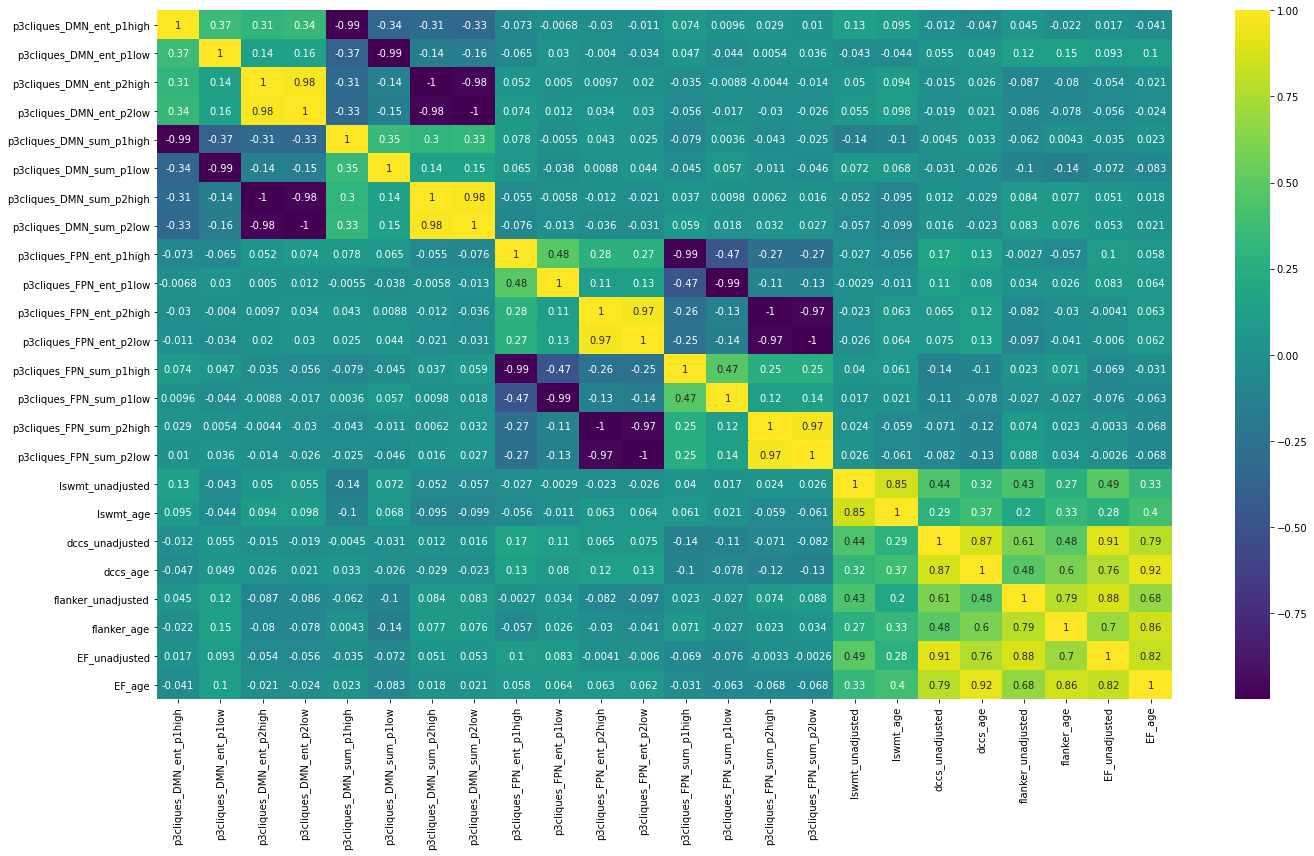

In [465]:
to_compare = p3_cliques + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

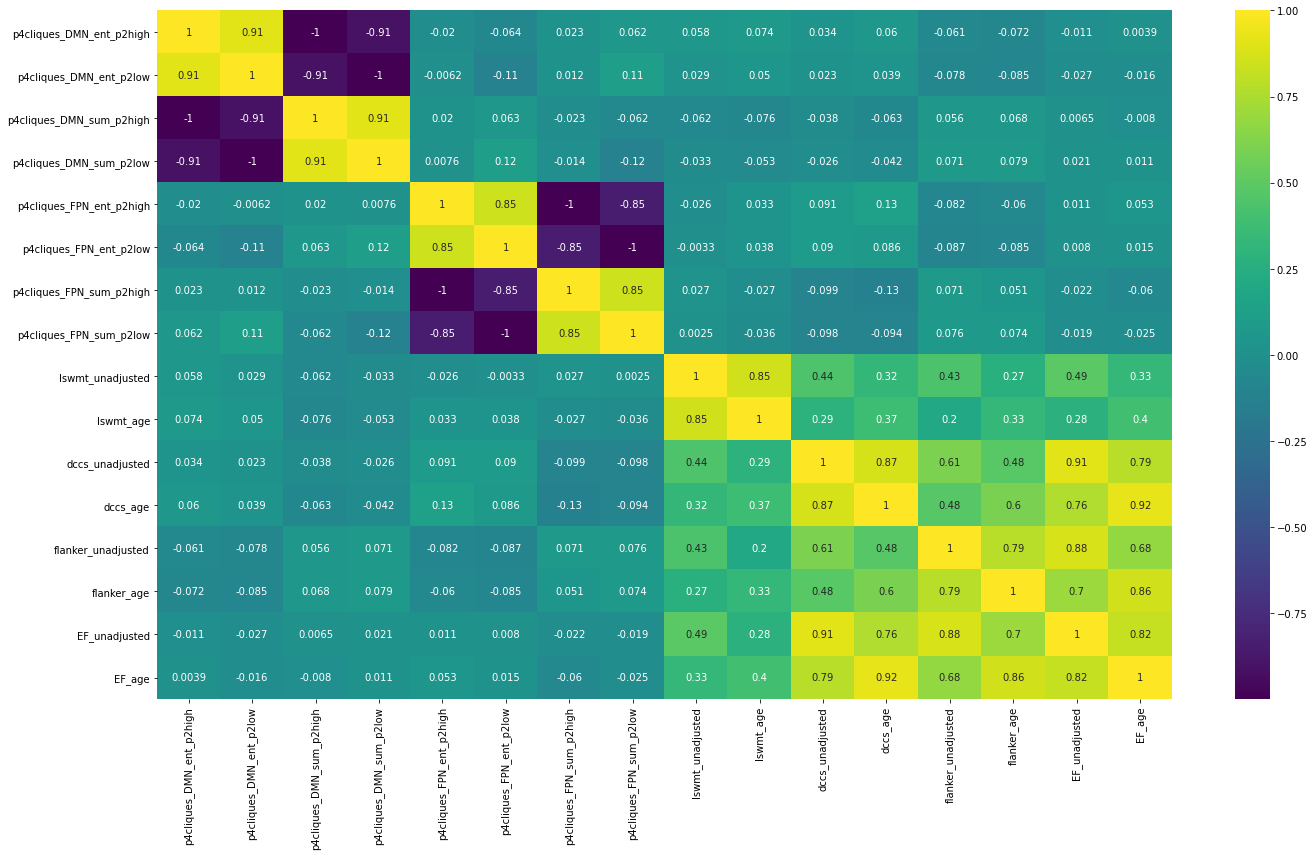

In [466]:
to_compare = p4_cliques + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

### Define functions for data exploration:

In [467]:
def regplot(X_column, y_column, df):
    
    X = df[X_column]
    y = df[y_column]
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = round(est2.pvalues[1], 5)
    R2 = round(est2.rsquared, 5)

    sns.regplot(x=X, y=y)
    plt.figtext(0.72, 0.78, f' R2: {R2} \n p: {p_value}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()

In [468]:
def pregplot(X_column, y_column, df):
    
    order = 2
    
    X = df[X_column]
    y = df[y_column]
    
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order)
    plt.figtext(0.72, 0.78, f' R2: {R2:.5f} \n p: {p_value:.5f}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()
    
# pregplot('bc_AUC_dim0', 'EF_age', df_no_nan)

In [469]:
def z_scored_df(df, X_column, cut_off, print_zscores):
    
    z_scored = np.abs(stats.zscore(df[X_column]))
    if print_zscores == 1:
        print(z_scored)
    filtered = (z_scored < cut_off)
    df_new = df[filtered]
    
    print(f'Number excluded: {df.shape[0] - df_new.shape[0]}')
    
    return df_new

In [470]:
def z_scored_regplot(x, y, dataframe, cut_off, print_zscores):
    
    X_column = x
    y = y
    df = dataframe
    
    regplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [471]:
def z_scored_pregplot(x, y, dataframe, cut_off, print_zscores):
    
    X_column = x
    y = y
    df = dataframe
    
    pregplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [472]:
def get_best_predictors(x, y, dataframe, n, zscore):
        
    # This function gets the n best predictors for a target and produces regression plots
    
    print(f'\n---------------- y = {y} ----------------\n')
    df = dataframe
    columns = []
    
    [columns.append(i) for i in x]
    columns.append(y)

    # Create correlation matrix
    corr = df[columns].corr()
    # Only include column with corr values with y-column, and exclude row with y (autocorrelation)
    # Absolutize to also get large negative correlation values
    corr = np.abs(corr.iloc[:-1,-1:])
    # Get n largest corr values
    corr = corr.nlargest(n, corr.columns)
    print(corr)
    print('\n')
    # Save predictors to list
    best_predictors = corr.index.to_list()
    # Make for each predictor regression plot
    [regplots(predictor, y, df, zscore) for predictor in best_predictors]
    
# get_best_predictors(global_features, 'fluidcog_age', df_no_nan, n=3, zscore=0)

In [480]:
def regplots(X_column, y_column, df, zscore):
    
    order = 2
    
    if zscore == 0:
        df = df
    else:
        df = z_scored_df(df, X_column, cut_off=zscore, print_zscores=0)
    
    X = df[X_column]
    y = df[y_column]
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    fig.suptitle(X_column)

    # Plot linear regression
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = est2.pvalues[1]
    R2 = est2.rsquared
    
    sns.regplot(x=X, y=y, ax=ax1)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax1.add_artist(anchored_text)
    
    # Plot polynomial regression
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order, ax=ax2)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax2.add_artist(anchored_text)
    
    plt.show()

----
### Data exploration per outcome:

Age


---------------- y = age_years ----------------

                   age_years
bc_AUC_dim0         0.427240
S_entropy_dim0      0.418952
curv_std_FPN_0.02   0.252059
top_vec_dim0        0.236508
curv_std_FPN_0.05   0.236024




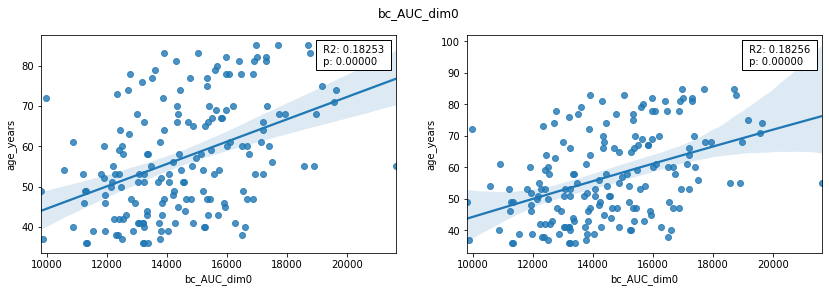

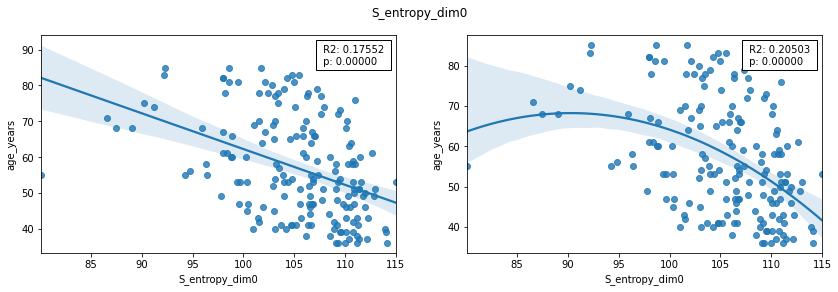

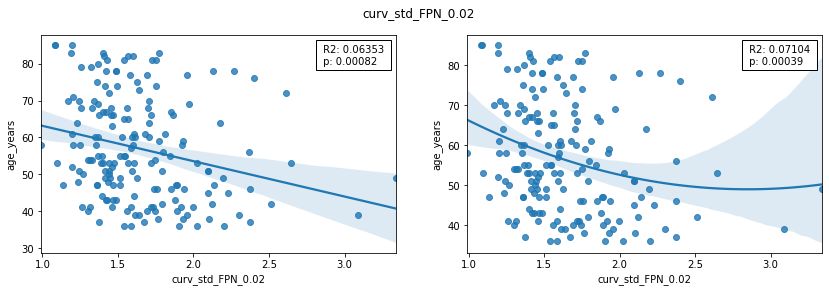

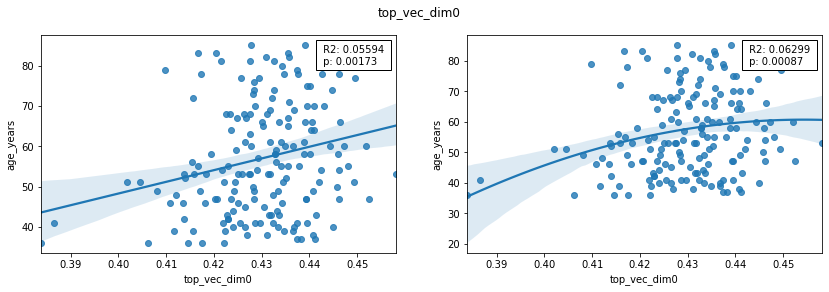

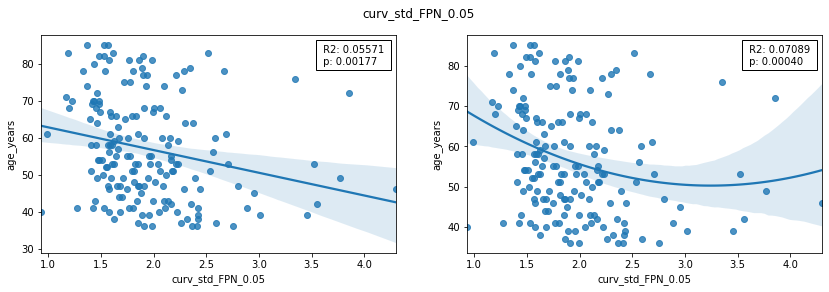

In [481]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features]

get_best_predictors(selected_features, 'age_years', df_no_nan, n=5, zscore=0)

fluidcog_age
- Flanker, Dimensional Change Card Sort, Picture Sequence Memory, List Sorting, Pattern Comparison test

Results:


--- 

### EF

dccs_age


---------------- y = dccs_age ----------------

                     dccs_age
bc_AUC_dim0          0.179977
curv_mean_FPN_0.05   0.157921
curv_mean_FPN_0.02   0.149212
curv_ent_all_p1high  0.143025
S_entropy_dim0       0.139391




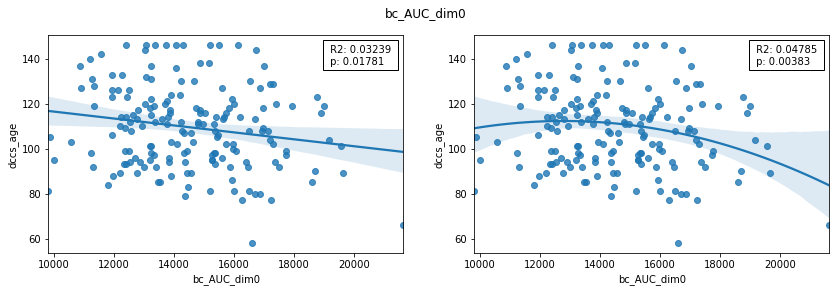

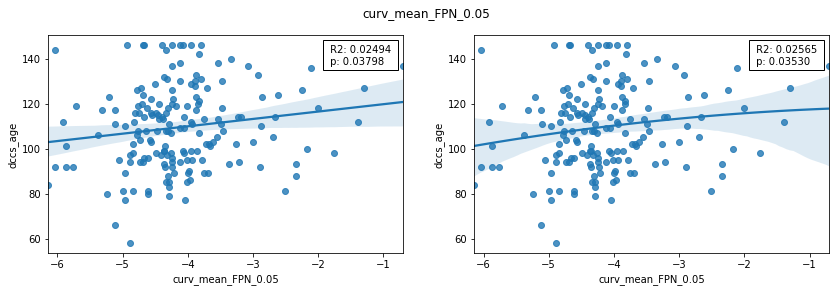

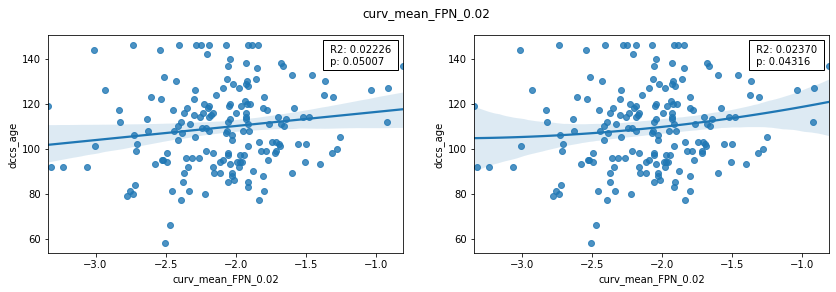

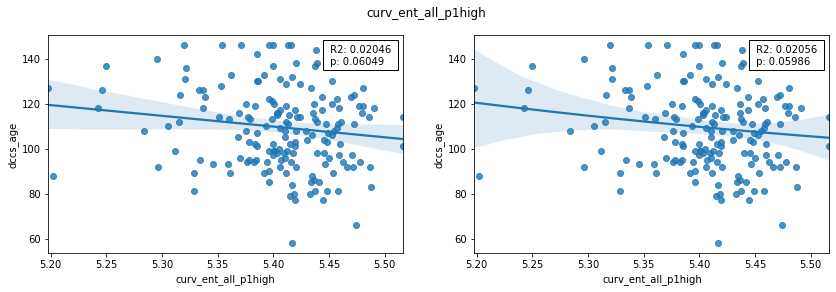

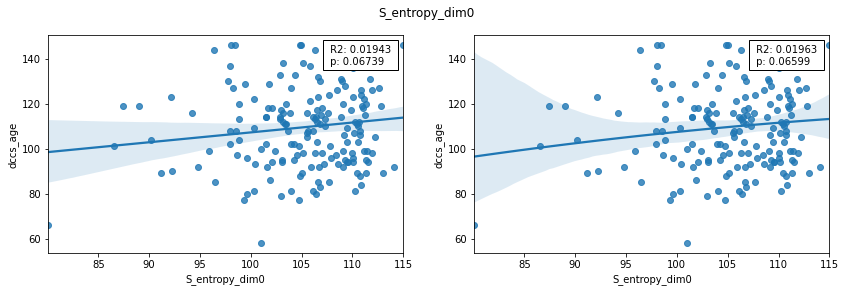

In [486]:
selected_features = list(tda_features)
to_remove = ['curv_skew_all_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'dccs_age', df_no_nan, n=5, zscore=0)

flanker_age


---------------- y = flanker_age ----------------

                    flanker_age
curv_ent_FPN_0.005     0.183582
curv_skew_FPN_0.02     0.165550
curv_ent_FPN_p1low     0.134263
curv_skew_DMN_0.02     0.115868
bc_AUC_dim1            0.114725




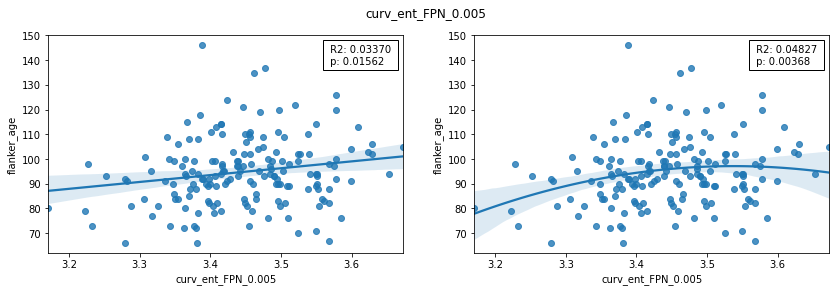

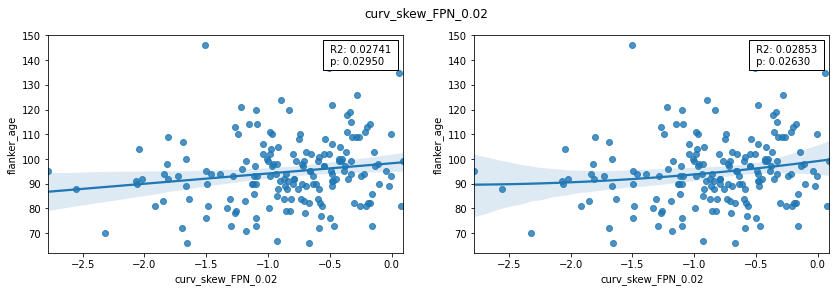

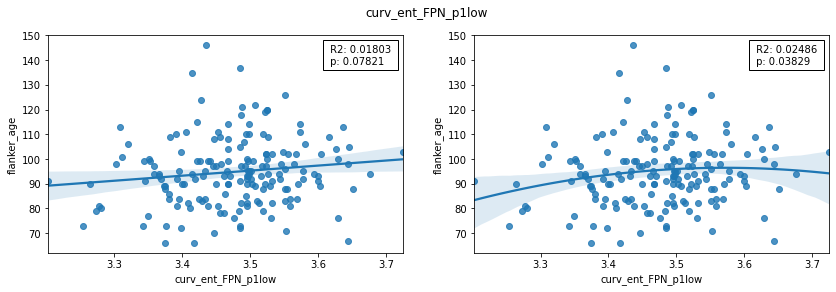

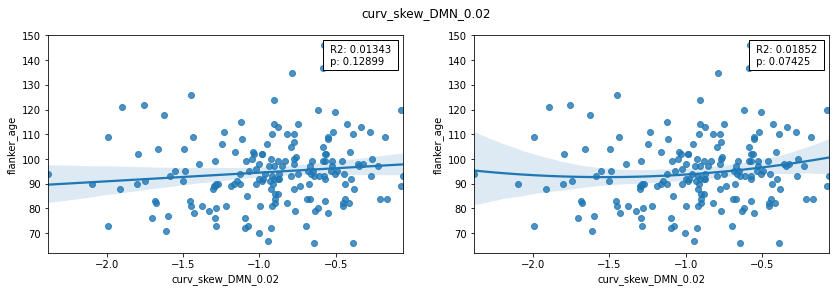

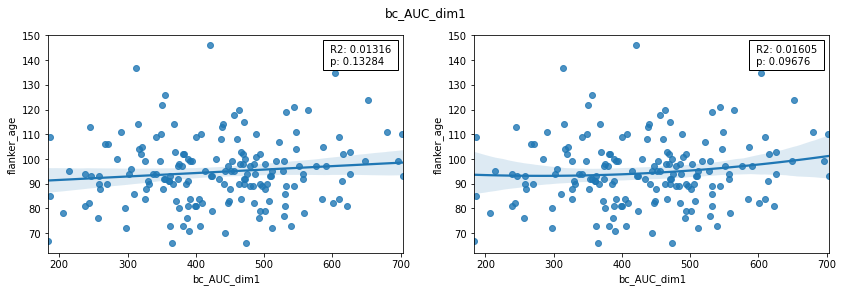

In [487]:
selected_features = list(tda_features)
to_remove = ['p3cliques_DMN_ent_p1low', 'curv_kur_FPN_0.02', 'p3cliques_DMN_sum_p1low']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'flanker_age', df_no_nan, n=5, zscore=0)

EF_age


---------------- y = EF_age ----------------

                      EF_age
curv_ent_FPN_0.005  0.168412
bc_AUC_dim0         0.154907
curv_skew_FPN_0.02  0.137201
curv_ent_FPN_p1low  0.122930
curv_kur_FPN_0.02   0.120434




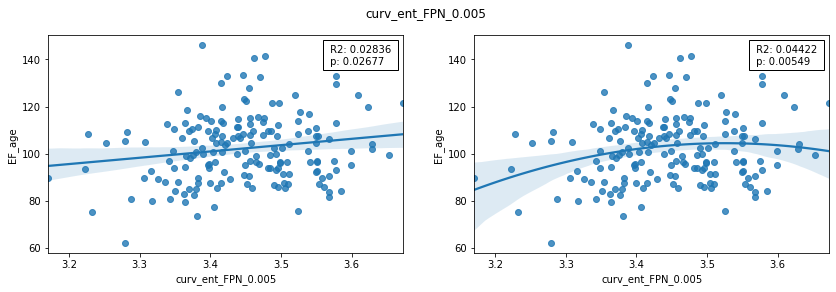

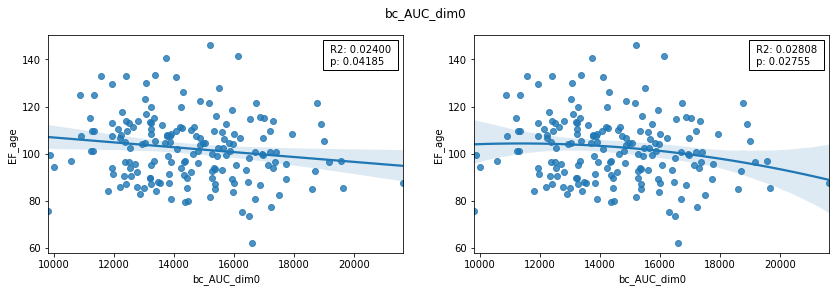

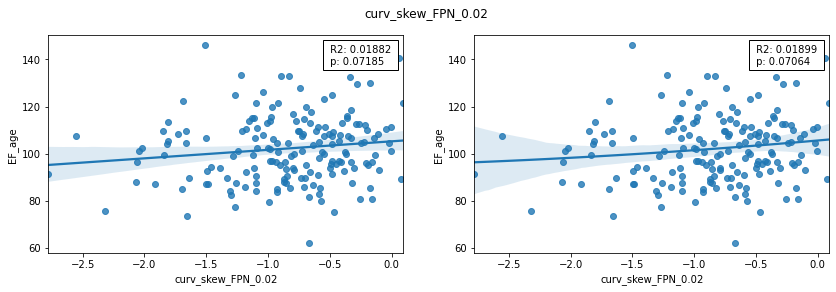

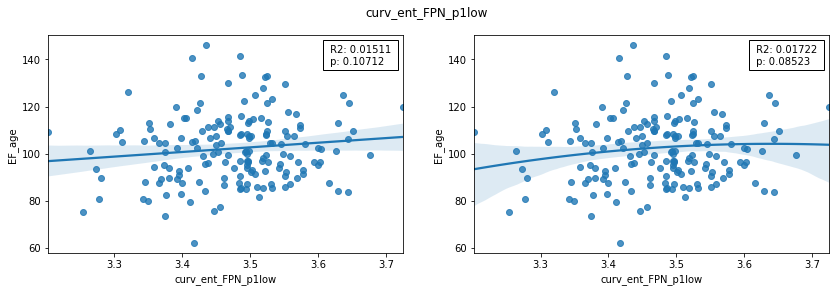

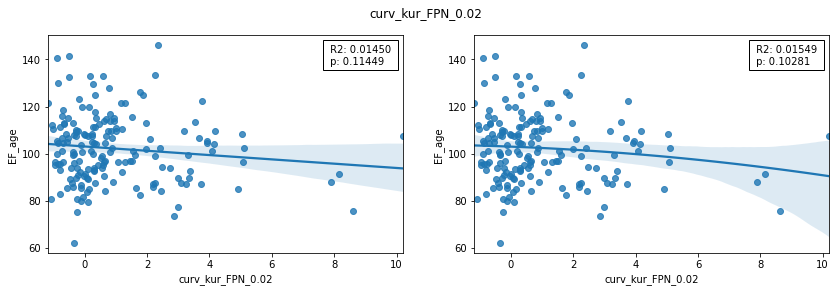

In [484]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'EF_age', df_no_nan, n=5, zscore=0)

---

### WM

lswmt_age


---------------- y = lswmt_age ----------------

                    lswmt_age
curv_ent_DMN_0.005   0.158460
top_vec_dim0         0.153536
curv_kur_DMN_0.01    0.126828
S_entropy_dim1       0.116584
pl_AUC_dim0          0.115696




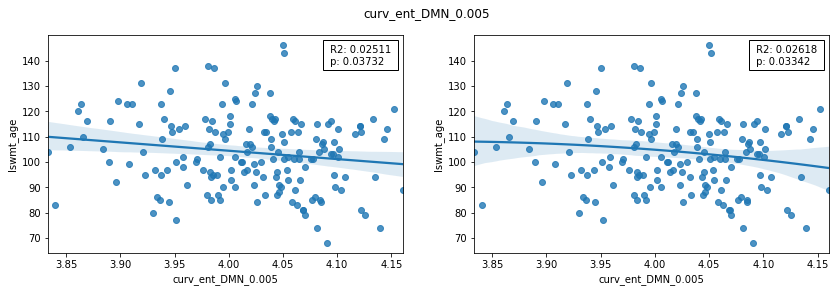

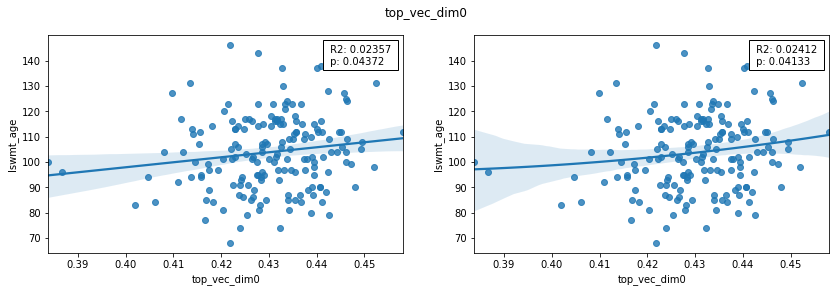

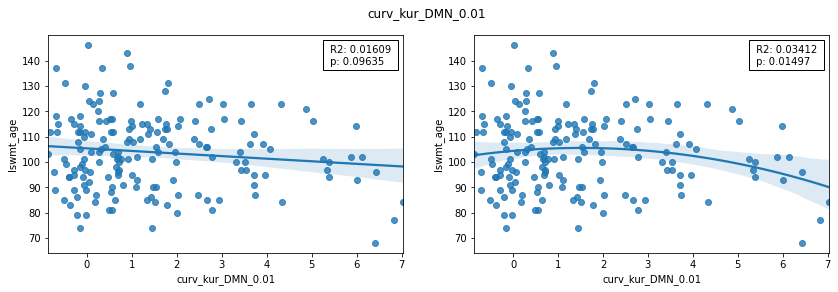

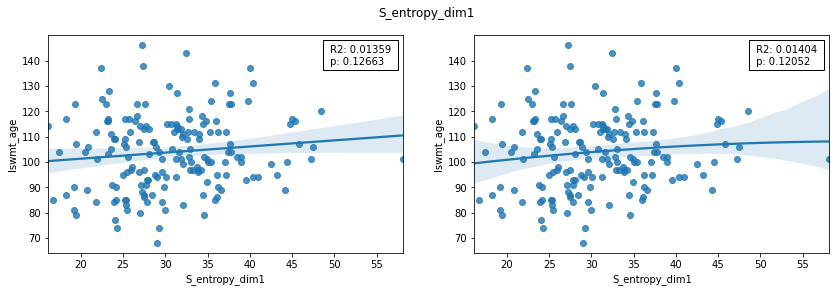

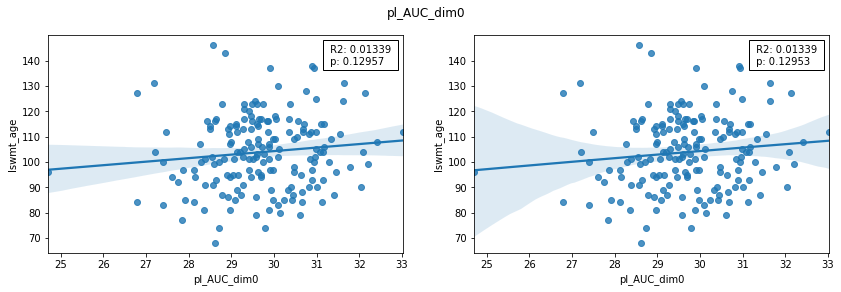

In [485]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'lswmt_age', df_no_nan, n=5, zscore=0)